## Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
pd.options.mode.chained_assignment = None  # default='warn'




## Используемые функции

In [2]:
def NaN_changer(series):
    ## Функция заменяет пустые строки на NaN значения 
    if series.dtype == 'O':
        series = series.apply(lambda x: None if pd.isnull(
            x) else None if x == 'nan' else None if x.strip() == '' else x)
    else:
        series = series.apply(lambda x: None if x == '' else x)


def med_iqr(series, verbose=True):
    ## Функция возвращает медиану, Q1, Q3, IQR 
    median = series.median()
    perc25 = series.quantile(0.25)
    perc75 = series.quantile(0.75)
    IQR = perc75 - perc25

    if verbose:
        print('25-й перцентиль: {},'.format(perc25), 
              '75-й перцентиль: {},'.format(perc75), 
              "IQR: {}, ".format(IQR),
              "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

    temp_dict = {'median': median, 'perc25': perc25,
                 'perc75': perc75, 'iqr': IQR}

    return temp_dict


def get_boxplot(df, x, y):
    ## Строит boxplot по заданным параметрам
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=x, y=y,
                data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_kdeplot(column):
    ## Строит KDE график по заданной колонке для score
    for index in stud_math[column].unique():
        sns.kdeplot(stud_math[stud_math[column] == index].score, label=index)
    plt.xlabel('score', size=10)
    plt.title(column, size=15)
    plt.show()




## Первичный осмотр данных.

In [3]:
stud_math = pd.read_csv('stud_math.xls')


In [4]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Из первичного осмотра данных можно сделать следующие выводы:

Привести все имена колонок к нижнему регистру;

Колонку "studytime, granular" переименовать в "studytime_granular"

В датафрейме 13 числовых столбцов и 17 строковых стобцов;

Присутствуют столбцы с null значениями

### Переименование столбцов.

In [5]:
stud_math.rename(
    columns={'studytime, granular': 'studytime_granular'}, inplace=True)

for i in stud_math.columns:
    stud_math.rename(columns={i: i.lower()}, inplace=True)

stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

### Замена пропусков.

In [6]:
for column in stud_math.columns:
    NaN_changer(stud_math[column])

### Анализ всех столбцов на уникальные и NaN значения.

In [7]:
for c in stud_math.columns:
    print("\n--------- %s --------\n" % c)
    print('Уникальные значения в %s =' % c, stud_math[c].dropna().unique())
    print()
    print('Количество уникальных значений в %s =' % c, len(stud_math[c].value_counts().sort_index()))
    print()
    print('Количество пустых значений в %s =' % c, stud_math[c].isnull().sum(axis=0))
    


--------- school --------

Уникальные значения в school = ['GP' 'MS']

Количество уникальных значений в school = 2

Количество пустых значений в school = 0

--------- sex --------

Уникальные значения в sex = ['F' 'M']

Количество уникальных значений в sex = 2

Количество пустых значений в sex = 0

--------- age --------

Уникальные значения в age = [18 17 15 16 19 22 20 21]

Количество уникальных значений в age = 8

Количество пустых значений в age = 0

--------- address --------

Уникальные значения в address = ['U' 'R']

Количество уникальных значений в address = 2

Количество пустых значений в address = 17

--------- famsize --------

Уникальные значения в famsize = ['GT3' 'LE3']

Количество уникальных значений в famsize = 2

Количество пустых значений в famsize = 27

--------- pstatus --------

Уникальные значения в pstatus = ['A' 'T']

Количество уникальных значений в pstatus = 2

Количество пустых значений в pstatus = 45

--------- medu --------

Уникальные значения в medu = [4

# Первичный анализ предоставленных данных:

### Школа

В выборке представлены две школы GP и MS. В школе GP средний балл немного лучше, стандартное откланенеие так-же немного выше. Это означает, что некоторые ученики в школе MS, не справятся с математикой. 

Данные будут влиять на модель.

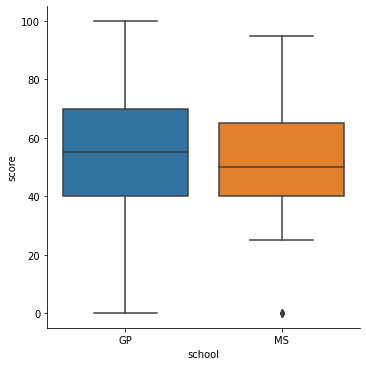

In [8]:
sns.catplot(x="school",y="score", kind="box",data=stud_math)

### Пол

Cредний балл полученный мальчиками и девочками также примерно равен, у мальчиков средний результат немного лучше. При этом медианное значение равно, и для мальчиков и для девочек. 

Данные будут влиять на модель.

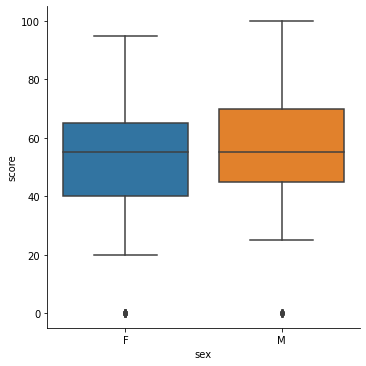

In [9]:
sns.catplot(x="sex",y="score",kind="box",data=stud_math)

### Возраст

Большой разброс среднего балла, в зависимости от возраста. 

Пустых значений нет.

Данные будут влиять на модель.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

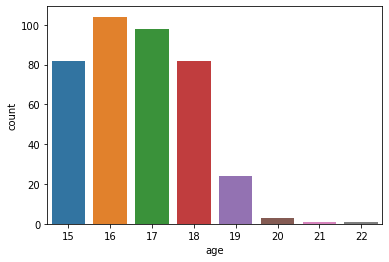

In [10]:
sns.countplot(x='age', data=stud_math)
stud_math.age.describe()

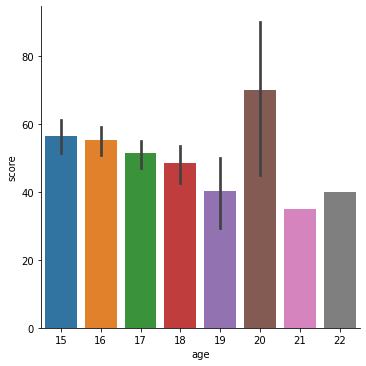

In [11]:
sns.catplot(x="age",y="score",kind="bar",data=stud_math)

### Адрес

Ученики разделены на две группы по месту проживания: за городом(R), и в городе(U). Ученики проживающие в городе, в среднем, имеют более высокий балл. 

Пустые значения имеет смысл заменить на самый распространённый показатель - "U"

Количество пустых значений "address" - 17

Данные будут влиять на модель.

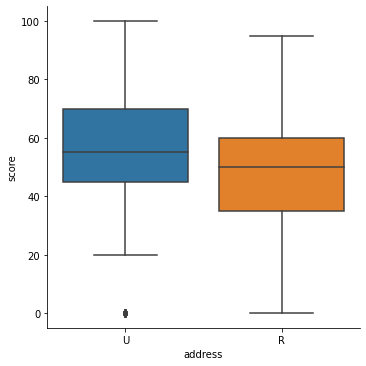

In [12]:
sns.catplot(x="address",y="score", kind="box",data=stud_math)

### Размер семьи

У большинства учеников в семье больше 3 человек. Представленные группы имеют одинаковыю медиану и почти одинаковое среднее значение среднего балла, в дальнейшем эти данные будут слабо влиять на модель.

Пустые значения имеет смысл заменить на самый распространённый показатель - "GT3"

Количество пустых значений "famsize" - 27

Данные не будут влиять на модель.

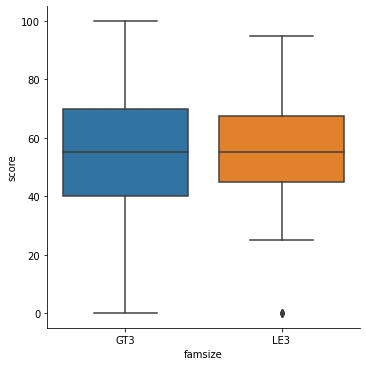

In [13]:
sns.catplot(x="famsize",y="score", kind="box",data=stud_math)

### Статус совместного проживания

Большинство учеников проживают в семьях, где родители живут совместно. Влияние данной характеристик и влияние на средний балл, схожа с "размером семьи". Количество пустых значений - 45.

Пустые значения имеет смысл заменить на самый распространённый показатель - "T"

Количество пустых значений "pstatus" - 45

Данные не будут влиять на модель.

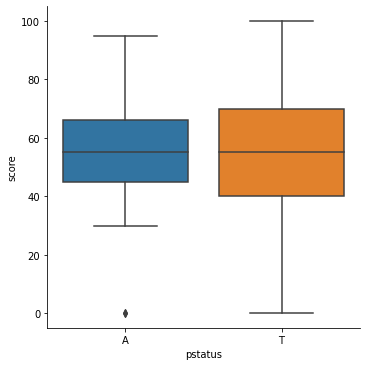

In [14]:
sns.catplot(x="pstatus",y="score", kind="box",data=stud_math)

### Образование матери

Качество образования родителей, оказывает заметное влияние на оценки учеников. Так-как данные будут влиять на модель, необходимо пустые значения заменить медианной.

Количество пустых значений "medu" - 3

Данные будут влиять на модель.

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

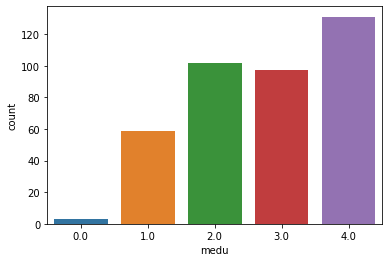

In [15]:
sns.countplot(x='medu', data=stud_math)
stud_math.medu.describe()

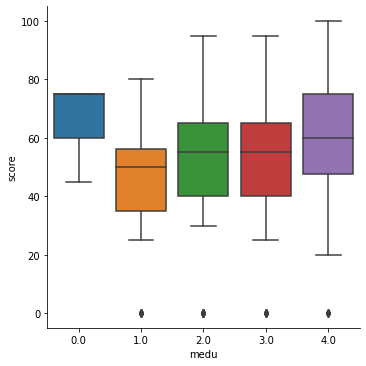

In [16]:
sns.catplot(x="medu",y="score", kind="box",data=stud_math)

### Образование отца

Качество образования отца, оказывает заметное влияние на оценки учеников. Так-как данные будут влиять на модель, необходимо пустые значения заменить медианной, а также заменить одну ошибку/вбросс  - значение 40 на 4 (либо на медианной значение)

Количество пустых значений "fedu" - 24

Данные будут влиять на модель.

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

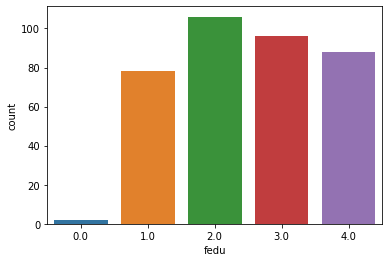

In [17]:
stud_math.loc[stud_math.fedu > 4, 'fedu'] = None
sns.countplot(x='fedu', data=stud_math)
stud_math.fedu.describe()

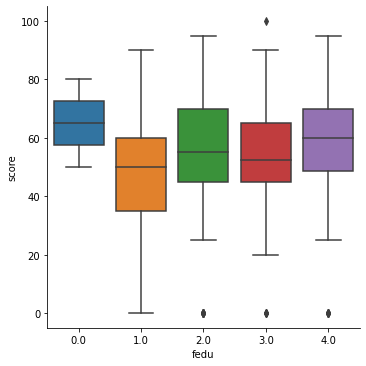

In [18]:
sns.catplot(x="fedu",y="score", kind="box",data=stud_math)

### Место работы матери, отца

Место работы родителей оказывает явное влияние на среднюю оценку. Место работы отцов, можно разделить на две группы: учителя (оказывает более сильное влияние), все остальные (оказывают примерно одинаковое влияние).

Пустые значения имеет смысл заменить на самый распространённым показателем - "other"

Количество пустых значений "mjob" - 19

Количество пустых значений "fjob" - 36

Данные будут влиять на модель.

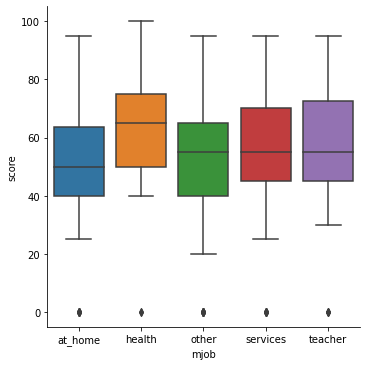

In [19]:
sns.catplot(x="mjob",y="score", kind="box",data=stud_math)

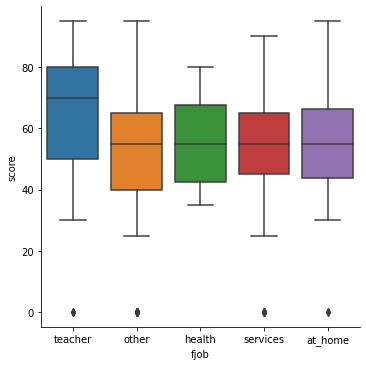

In [20]:
sns.catplot(x="fjob",y="score", kind="box",data=stud_math)

### Причина выбора школы 

Первичный анализ выбора школы не выявил явных зависимостей, за исключение учеников выбравших причиной образовательную программы "course". Можно разделить учеников на две группы тех кто пошёл из-за програмы и всех остальных и в дальнейшем провести корреляционный анализ.

Пустые значения имеет смысл заменить на самый распространённым показателем - 'course'

Количество пустых значений "reason" - 17

Данные будут влиять на модель.

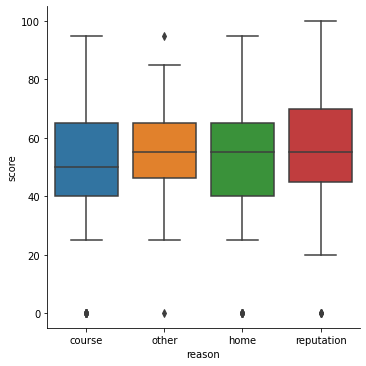

In [21]:
sns.catplot(x="reason",y="score", kind="box",data=stud_math)

### Опекун

Cредняя оценка ученика снижается, если опекуном указаны - «другие» являются опекунами. В тоже время если опекунами являются мать и отец, значения примерно равны. Данную характеристику можно разделить на две группы, обединив отца и мать в одну группу.

Пустые значения имеет смысл заменить на самый распространённым показателем - 'mother'

Количество пустых значений "guardian" - 31

Данные будут влиять на модель.

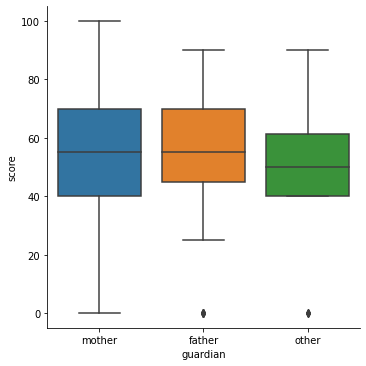

In [22]:
sns.catplot(x="guardian",y="score", kind="box",data=stud_math)

### Время в пути до школы 

Анализ выявил что нет существенной разницы, если ученику потребуется более 15 минут, чтобы добраться до школы (значения 2,3,4 имеют одинаковые показатели). Однако, чем ближе к школе, тем выше средний балл. Можно объеденить значения 2,3,4 в одно значение(2).

Пустые значения имеет смысл заменить на самый распространённым показателем - '1'

Количество пустых значений "traveltime" - 28

Данные будут влиять на модель.



count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

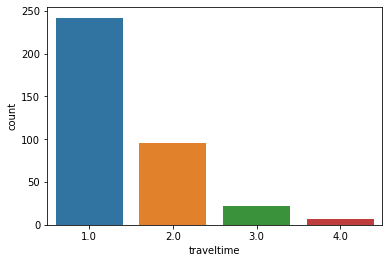

In [23]:
sns.countplot(x='traveltime', data=stud_math)
stud_math.traveltime.describe()

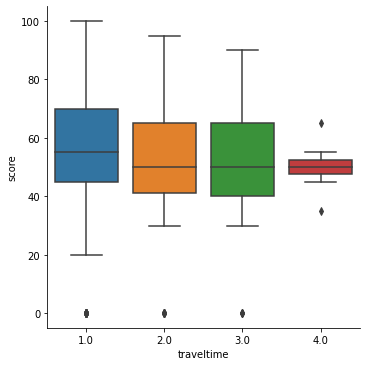

In [24]:
sns.catplot(x="traveltime",y="score", kind="box",data=stud_math)

### Время на учёбу помимо школы в неделю

Очевидно, что чем больше ученик учится, тем выше оценка. Но через 5-10 часов значительного улучшения оценки не наблюдается. Можно сгруппировать значения 3,4 в 3.

Пустые значения имеет смысл заменить на самый распространённый показатель - '2'

Количество пустых значений "studytime" - 28

Данные будут влиять на модель.

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

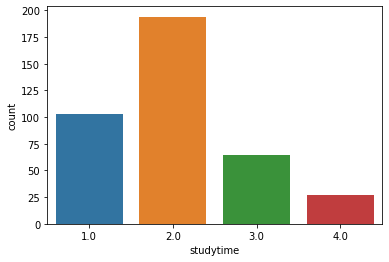

In [25]:
sns.countplot(x='studytime', data=stud_math)
stud_math.studytime.describe()

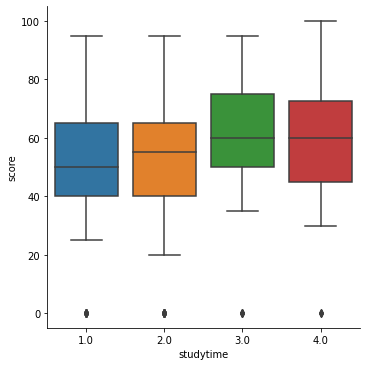

In [26]:
sns.catplot(x="studytime",y="score", kind="box",data=stud_math)

### Количество внеучебных неудач

Чем меньше ученик терпит неудачу, тем выше его оценка. Стоит обратить внимание на учеников, у кого показатель неудач больше или равен двум.

Пустые значения имеет смысл заменить самым распространённым показателем - '0'

Количество пустых значений "failures" - 22

Данные будут влиять на модель.

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

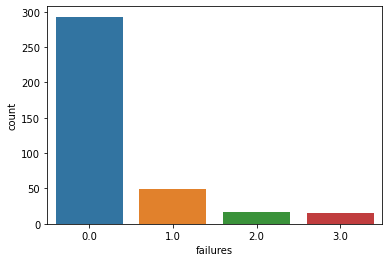

In [27]:
sns.countplot(x='failures', data=stud_math)
stud_math.failures.describe()

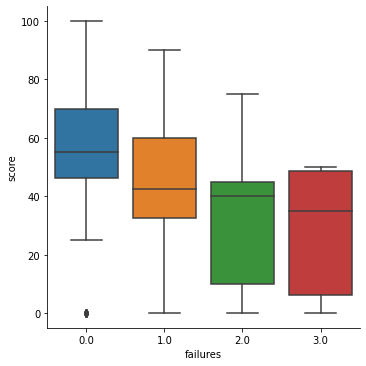

In [28]:
sns.catplot(x="failures",y="score", kind="box",data=stud_math)

### Дополнительная образовательная поддержка 

Учащиеся которым оказыватеся дополнительная поддержка имеют более низкий средний балл. В то время как у учеников без такой подержки, несмотря на более высокую среднюю оценку, более высокие показатели среднего отклонения. 

Пустые значения имеет смысл заменить самым распространённым показателем - 'no'

Количество пустых значений "schoolsup" - 9

Данные будут влиять на модель.


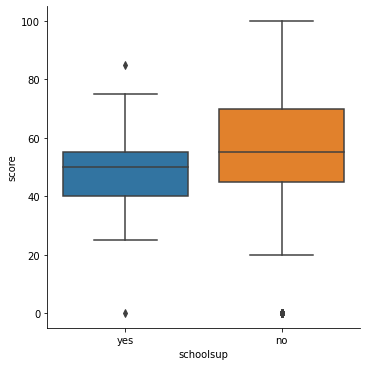

In [29]:
sns.catplot(x="schoolsup",y="score", kind="box",data=stud_math)

### Семейная образовательная поддержка

Анализ не выявил большой разницы между учениками, которым была оказана поддержка в семейном образовании, и теми, у кого ее нет.

Пустые значения имеет смысл заменить самым распространённым показателем - 'yes'

Количество пустых значений "famsup" - 39

Данные не будут влиять на модель.

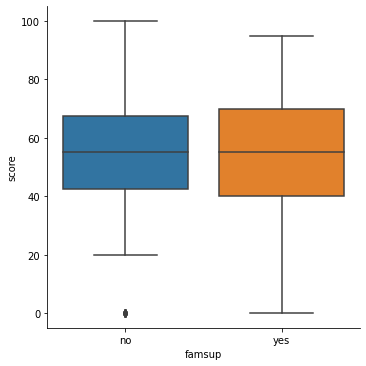

In [30]:
sns.catplot(x="famsup",y="score", kind="box",data=stud_math)

### Дополнительные платные занятия по математике 

Дополнительные занятия почти не оказывают влияния на среднюю оценку, несмотря на меньшую дисперсию для тех, кто заплатил.

Пустые значения имеет смысл заменить самым распространённым показателем - 'no'

Количество пустых значений "paid" - 40

Данные не будут влиять на модель.

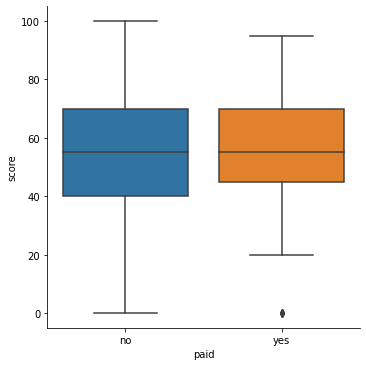

In [31]:
sns.catplot(x="paid",y="score", kind="box",data=stud_math)

### Дополнительные внеучебные занятия

Дополнительные внеучебные занятия оказывают ещё меньше влияния в сравнении с платными занятиями. 

Пустые значения имеет смысл заменить самым распространённым показателем - 'yes'

Количество пустых значений "activities" - 14

Данные не будут влиять на модель.

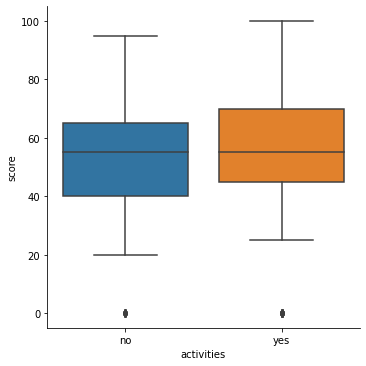

In [32]:
sns.catplot(x="activities",y="score", kind="box",data=stud_math)

### Посещал детский сад 

Посещение детского сада почти не оказывает влияния еа средний балл, несмотря на меньшую дисперсию для тех, кто не ходил. 

Пустые значения имеет смысл заменить самым распространённым показателем - 'yes'

Количество пустых значений "nursery" - 16

Данные не будут влиять на модель.

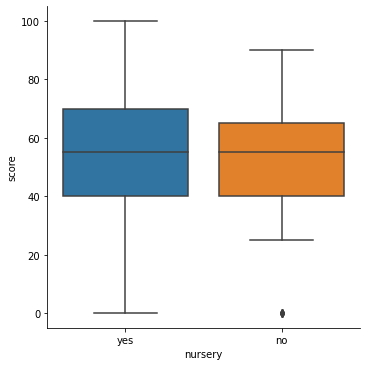

In [33]:
sns.catplot(x="nursery",y="score", kind="box",data=stud_math)

### studytime, granular

В дата фреме представленна переменная 'studytime, granular'  которая полность дублирует значения переменной 'studytime'. Её можно удалить.

In [34]:
stud_math.drop(['studytime_granular'], inplace=True, axis=1)

### Хочет получить высшее образование

Желание ученика получить высшее образование оказывает влияние на его средний балл. 

Пустые значения имеет смысл заменить на самый распространённый показатель - 'yes'

Количество пустых значений "higher" - 20

Данные будут влиять на модель.

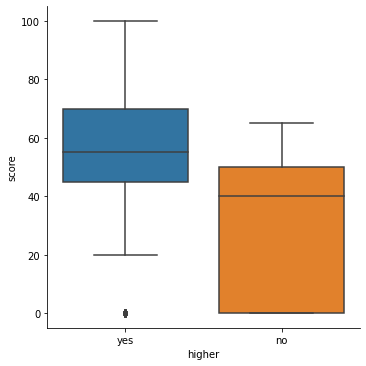

In [35]:
sns.catplot(x="higher",y="score", kind="box",data=stud_math)

### Наличие интернета дома

Наличие интернета дома, оказывает большое влияние на средний балл. 

Пустые значения имеет смысл заменить на самый распространённый показатель - 'yes'

Количество пустых значений "internet" - 34

Данные будут влиять на модель.

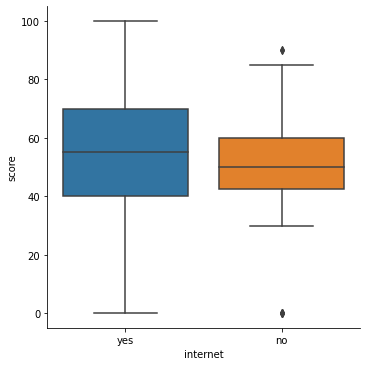

In [36]:
sns.catplot(x="internet",y="score", kind="box",data=stud_math)

### В романтических отношениях

Наличие романтических отношений не оказывает явного влияния на средний балл. 

Пустые значения имеет смысл заменить самым распространённым показателем - 'no'

Количество пустых значений "romantic" - 31

Данные не будут влиять на модель.


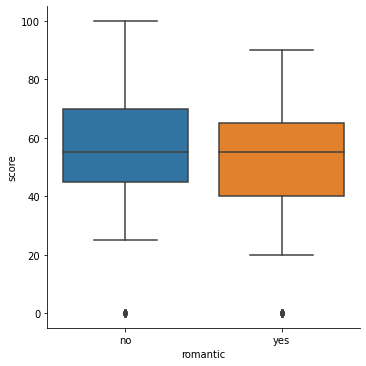

In [37]:
sns.catplot(x="romantic",y="score", kind="box",data=stud_math)

### Семейные отношения 

Семейный отношения, в целом, не оказывают большого влияния, не смотря на выделяющиеся показатели у учеников с очень плохими отношениями в семье.

Пустые значения заменить медианной, а также заменить одну ошибку/выброс  - значение -1.0 на 1 (либо на среднее значение).

Количество пустых значений "famrel" - 27

Данные не будут влиять на модель.

count    367.000000
mean       3.950954
std        0.891853
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

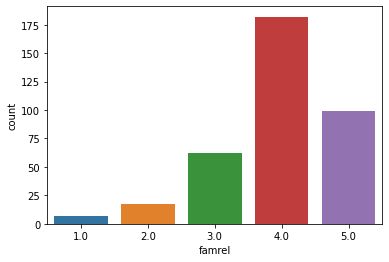

In [38]:
stud_math.loc[stud_math.famrel < 1, 'famrel'] = None
sns.countplot(x='famrel', data=stud_math)
stud_math.famrel.describe()

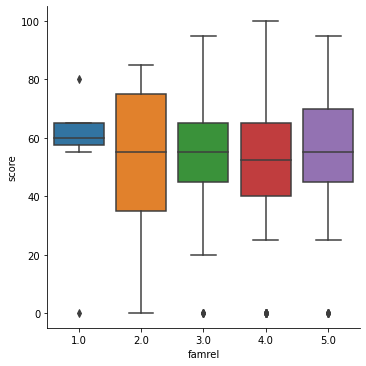

In [39]:

sns.catplot(x="famrel",y="score", kind="box",data=stud_math)

### Свободное время после школы

Количество свободного время после школы, оказывает очень неоднозначное влияние на средний балл. Рекомендуется оставить данную переменную и проверить её корреляцию.

Пустые значения имеет смысл заменить медианным значением - 3

Количество пустых значений "freetime" - 11

Данные будут влиять на модель.


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

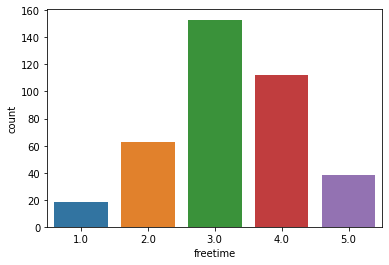

In [40]:
sns.countplot(x='freetime', data=stud_math)
stud_math.freetime.describe()

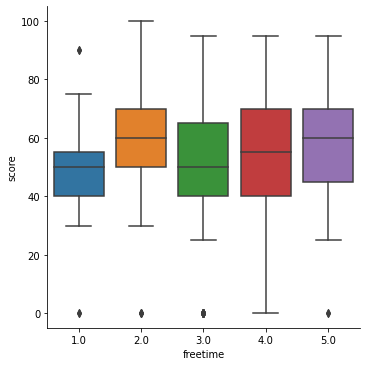

In [41]:
sns.catplot(x="freetime",y="score", kind="box",data=stud_math)

### Проведение времени с друзьями 

Аналогично свободному времени после школы время, проведённое с друзьями, оказывает неоднозначное влияние. Видно, что чем больше времени ученики проводят с друзьями, тем хуже оценка, а ученики, проводившие меньше всего времени с друзьями, не получают более высокий балл. Наиболее высокий балл у учеников, которые указали значения 3,4.    

Пустые значения имеет смысл заменить медианным значением - 3

Количество пустых значений "goout" - 8

Данные будут влиять на модель.


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

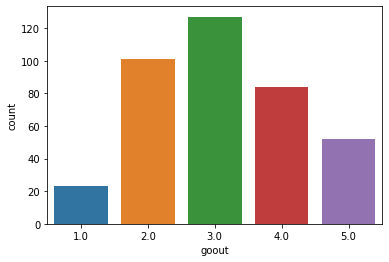

In [42]:
sns.countplot(x='goout', data=stud_math)
stud_math.goout.describe()

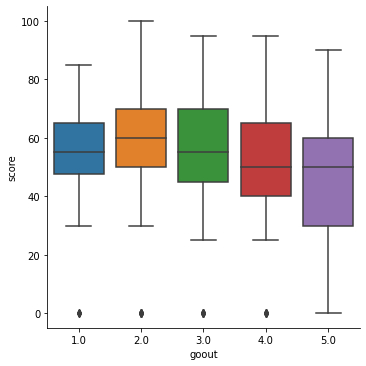

In [43]:
sns.catplot(x="goout",y="score", kind="box",data=stud_math)

### Текущее состояние здоровья

У большинства учеников здоровье хорошее. Ученики, жалующиеся на здоровье, имеют более высокий средний бал. Выбросов нет. 

Пустые значения имеет смысл заменить медианным значением - 4

Количество пустых значений "health" - 15

Данные будут влиять на модель.


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

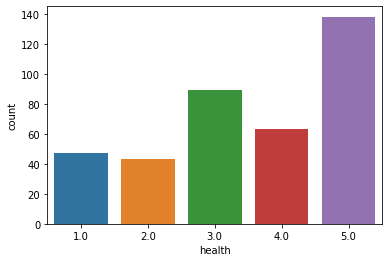

In [44]:
sns.countplot(x='health', data=stud_math)
stud_math.health.describe()

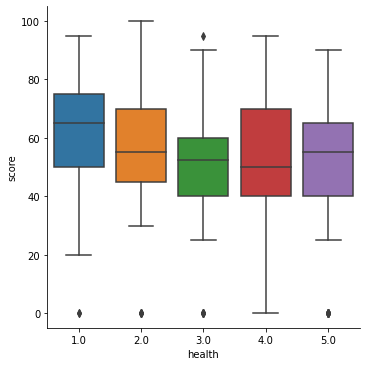

In [45]:
sns.catplot(x="health",y="score", kind="box",data=stud_math)

### Количество пропущенных занятий

Количество пропусков однозначно должно влиять на среднюю оценку, потому значения необходимо актуализировать изначально, так-как имеются явные выбросы. Применим формулу межквартильного размаха для выбросов, а для пустых значений можно использовать медианное значение.

Количество пустых значений "absences" - 12

Данные будут влиять на модель.


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

<AxesSubplot:>

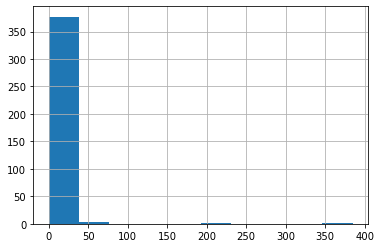

In [46]:
display(stud_math.absences.describe())
stud_math.absences.hist()

Проверка на выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


<AxesSubplot:>

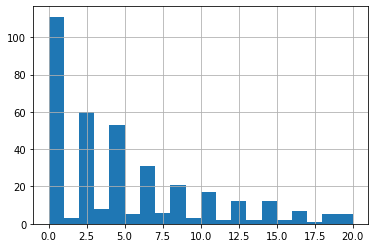

In [47]:
params = med_iqr(stud_math.absences)

stud_math[stud_math.absences.between(
    params['perc25'] - 1.5*params['iqr'], params['perc75'] + 1.5*params['iqr'])]['absences'].hist(bins=20)

In [48]:
stud_math.loc[((stud_math.absences < (params['perc25'] - 1.5*params['iqr'])) |
                  (stud_math.absences > (params['perc75'] + 1.5*params['iqr']))), 'absences'] = None

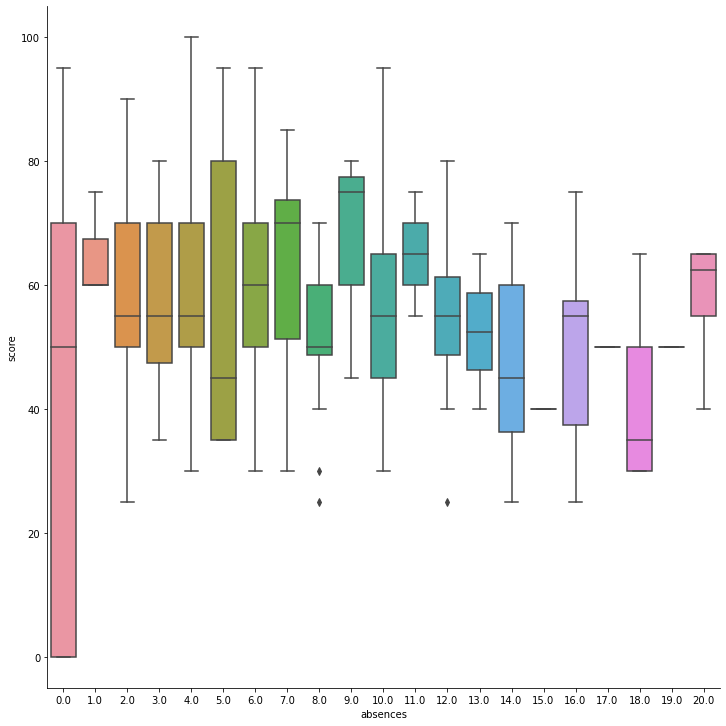

In [49]:
sns.catplot(x="absences",y="score", kind="box",data=stud_math, height=10)

### Результат

Результат — это основное значение, с которым работаем. Первичный анализ выявил несколько результатов равных "0". Так-как это может быть как выброс (проверка это не подтвердила), так и реальный результат (ученик мог сдать пустой тест или не прийти на экзамен), данные значения можно оставить. Пустые значения, из-за их небольшого количества, можно заменить медианным значением.

Количество пустых значений "score" - 6

Данные будут влиять на модель.


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<AxesSubplot:>

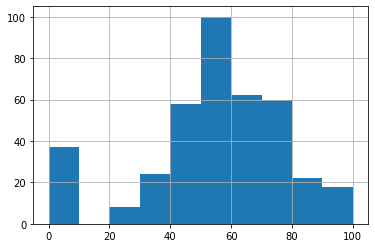

In [50]:
display(stud_math.score.describe())
stud_math.score.hist()

Проверка на выбросы

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


<AxesSubplot:>

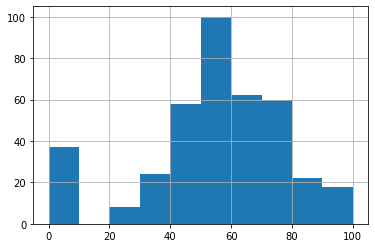

In [51]:
params = med_iqr(stud_math.score)

stud_math[stud_math.score.between(
    params['perc25'] - 1.5*params['iqr'], params['perc75'] + 1.5*params['iqr'])]['score'].hist()

# Очистка данных

Заменяем все пустые значения на ранее предложенными варантами.

In [52]:
for c in stud_math.columns:
    if stud_math[c].dtypes == 'O':
        stud_math[c].fillna(stud_math[c].mode()[0], inplace=True)
    else:
        stud_math[c].fillna(stud_math[c].median(), inplace=True)
    print('Количество пустых строк в %s =' % c, stud_math[c].isnull().sum(axis=0))
    print()

Количество пустых строк в school = 0

Количество пустых строк в sex = 0

Количество пустых строк в age = 0

Количество пустых строк в address = 0

Количество пустых строк в famsize = 0

Количество пустых строк в pstatus = 0

Количество пустых строк в medu = 0

Количество пустых строк в fedu = 0

Количество пустых строк в mjob = 0

Количество пустых строк в fjob = 0

Количество пустых строк в reason = 0

Количество пустых строк в guardian = 0

Количество пустых строк в traveltime = 0

Количество пустых строк в studytime = 0

Количество пустых строк в failures = 0

Количество пустых строк в schoolsup = 0

Количество пустых строк в famsup = 0

Количество пустых строк в paid = 0

Количество пустых строк в activities = 0

Количество пустых строк в nursery = 0

Количество пустых строк в higher = 0

Количество пустых строк в internet = 0

Количество пустых строк в romantic = 0

Количество пустых строк в famrel = 0

Количество пустых строк в freetime = 0

Количество пустых строк в goout = 0

К

### Корреляция для числовых столбцов.

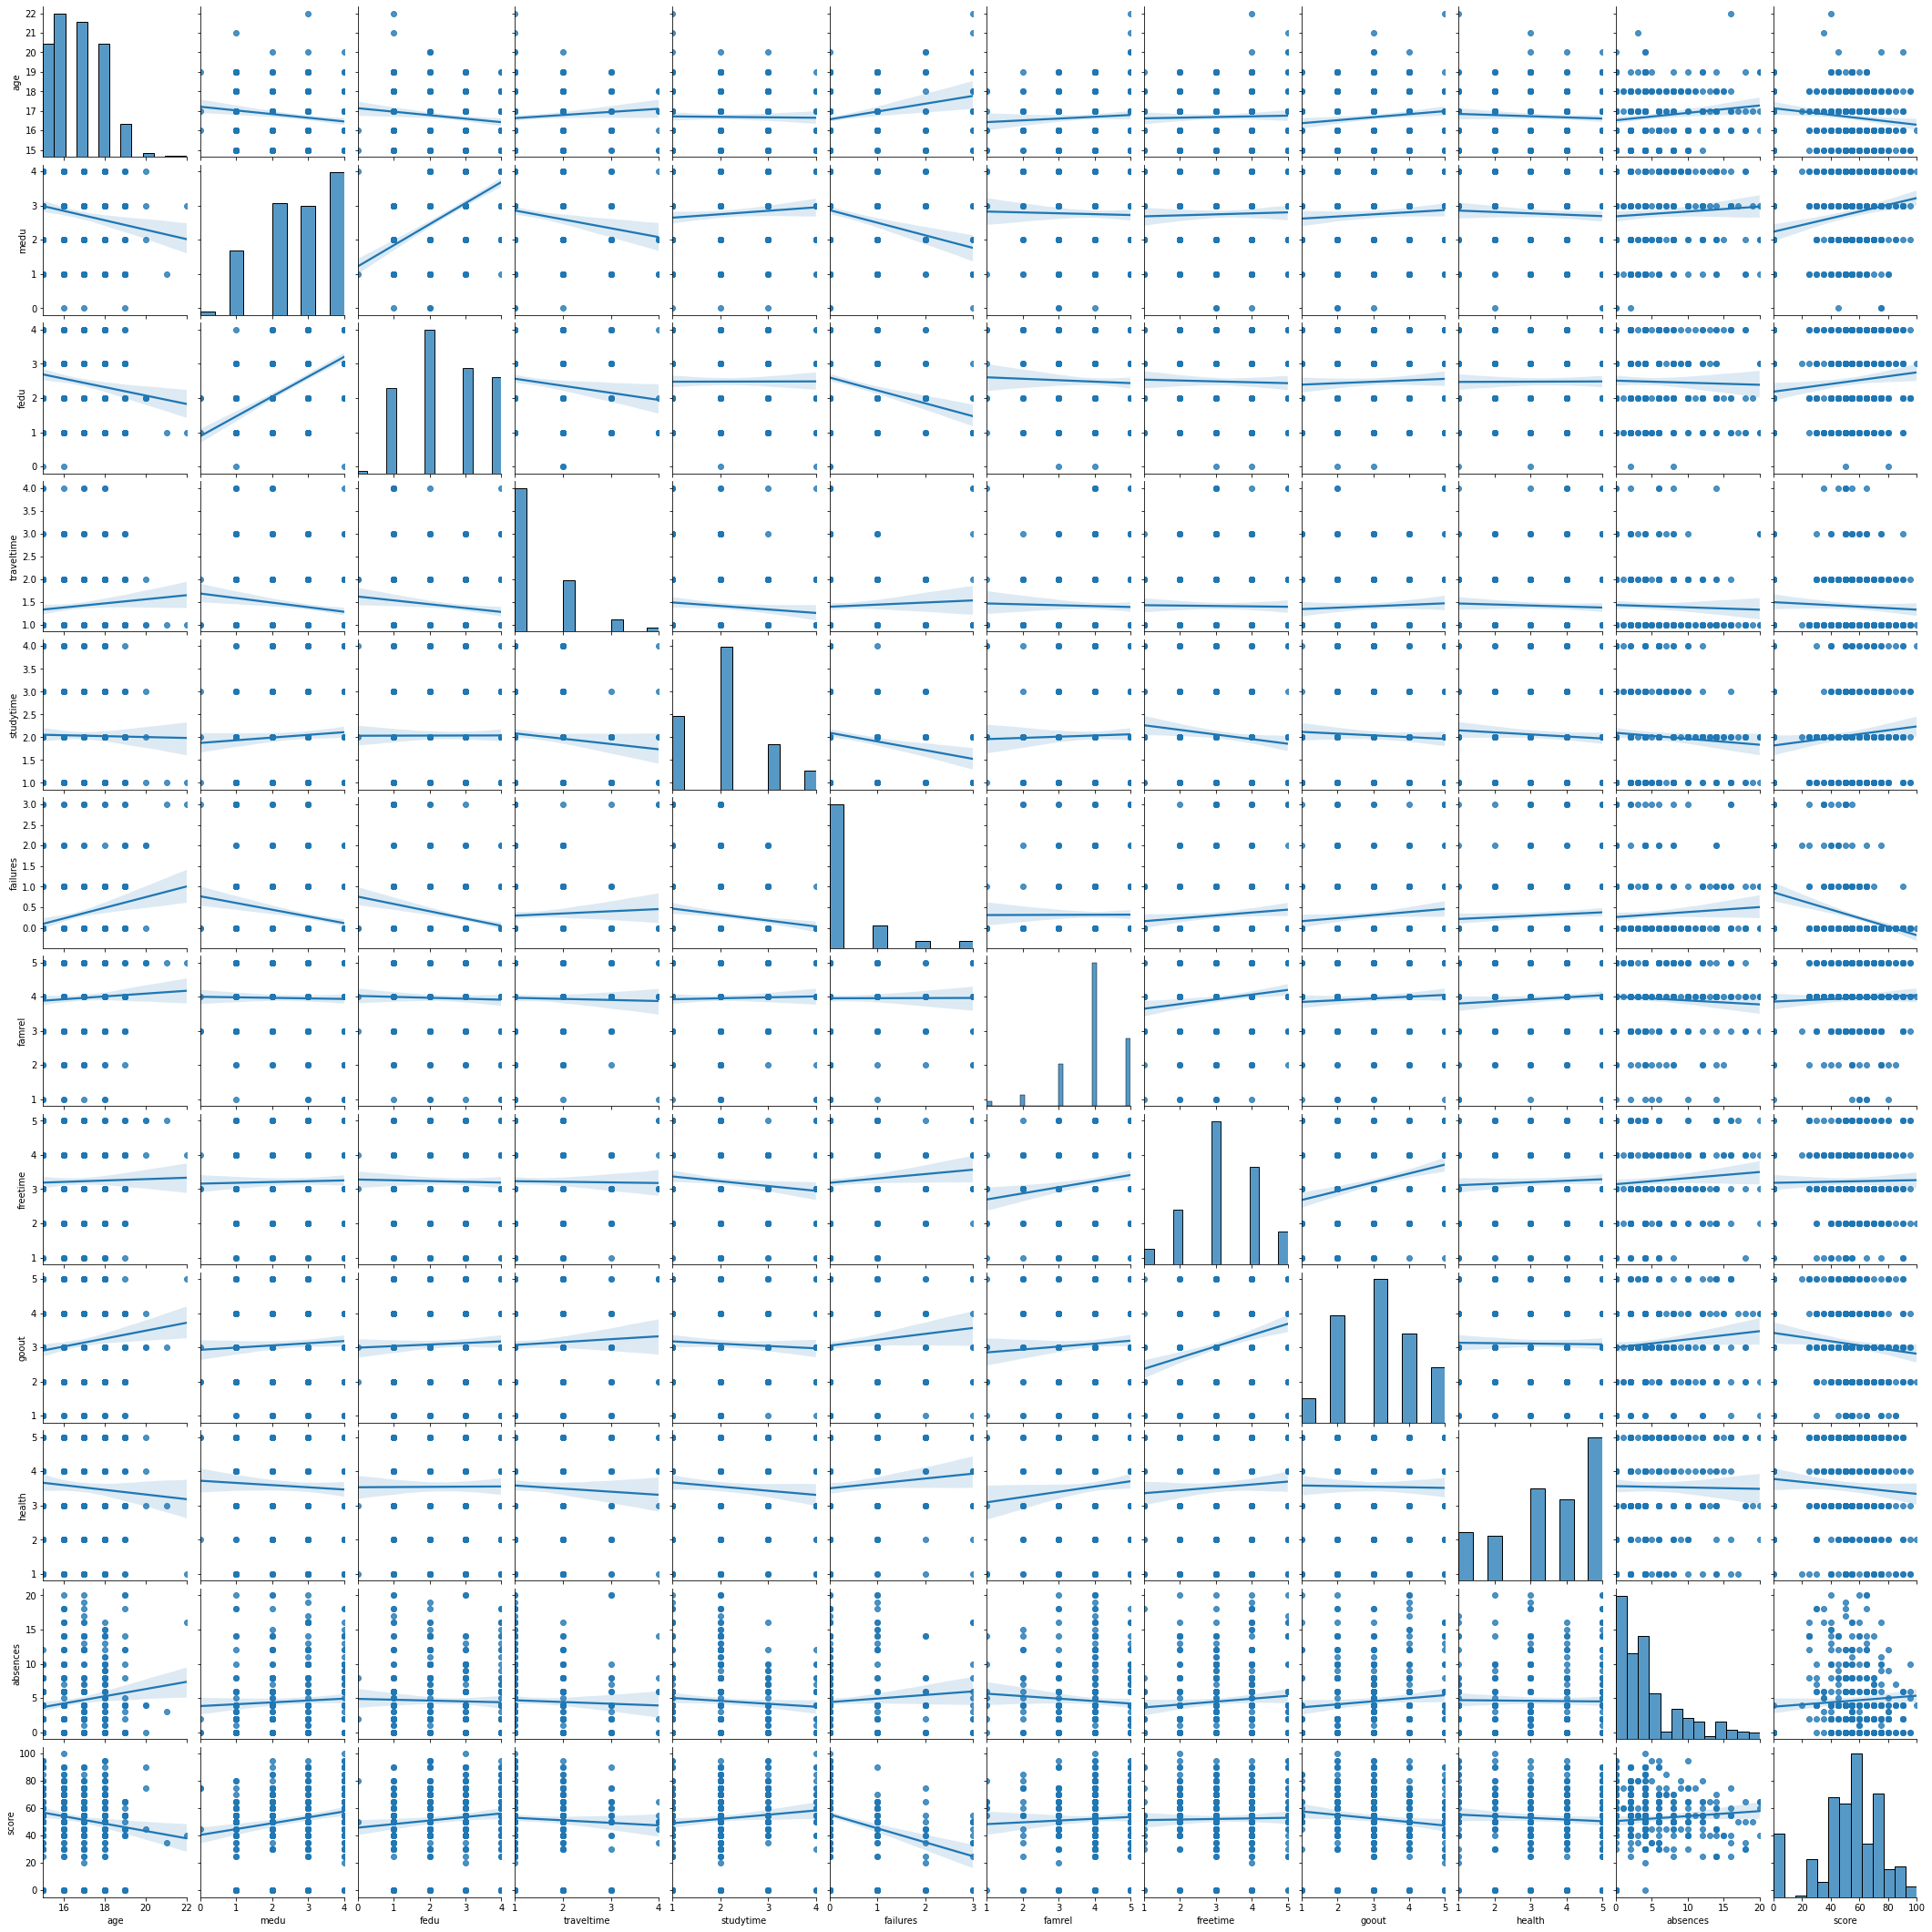

In [53]:
sns.pairplot(stud_math, kind='reg')

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.148776,0.084755,-0.015355,0.228081,0.061386,0.026443,0.134069,-0.063892,0.141065,-0.151150
medu,-0.161375,1.000000,0.597789,-0.160877,0.077050,-0.245110,-0.020145,0.026210,0.063361,-0.050991,0.062010,0.205568
fedu,-0.148776,0.597789,1.000000,-0.132151,0.002252,-0.259194,-0.034379,-0.023954,0.043961,0.004573,-0.027194,0.121308
traveltime,0.084755,-0.160877,-0.132151,1.000000,-0.094637,0.049670,-0.024643,-0.012496,0.051775,-0.044842,-0.036046,-0.055243
studytime,-0.015355,0.077050,0.002252,-0.094637,1.000000,-0.166598,0.027181,-0.119014,-0.051090,-0.073674,-0.074658,0.114371
failures,0.228081,-0.245110,-0.259194,0.049670,-0.166598,1.000000,0.003015,0.094826,0.113649,0.075849,0.079299,-0.326532
famrel,0.061386,-0.020145,-0.034379,-0.024643,0.027181,0.003015,1.000000,0.156711,0.066468,0.096586,-0.064784,0.049513
freetime,0.026443,0.026210,-0.023954,-0.012496,-0.119014,0.094826,0.156711,1.000000,0.292305,0.060557,0.086704,0.018200
goout,0.134069,0.063361,0.043961,0.051775,-0.051090,0.113649,0.066468,0.292305,1.000000,-0.014274,0.103337,-0.125708
health,-0.063892,-0.050991,0.004573,-0.044842,-0.073674,0.075849,0.096586,0.060557,-0.014274,1.000000,-0.013697,-0.072776


<AxesSubplot:>

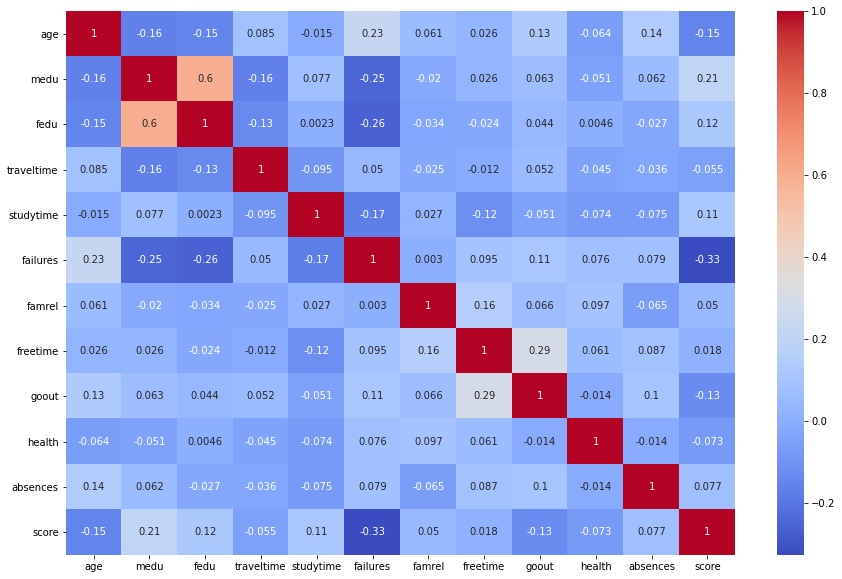

In [54]:
correlation = stud_math.corr()
display(correlation)
plt.subplots(figsize=(15,10))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

Из корреляционного анализа числовых данных видно, что прослеживается средняя положительная корреляция между fedu и medu и слабая отрицательая корреляция между score и failures.

### Различия score в зависимости от значений номинативных переменных.

['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


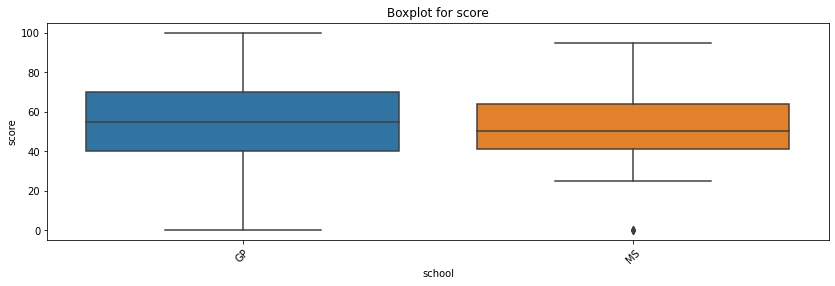

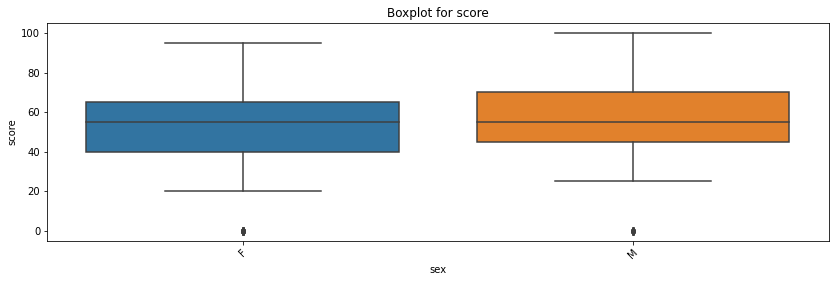

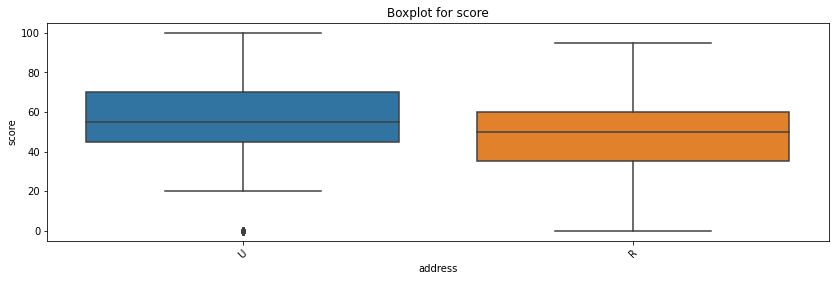

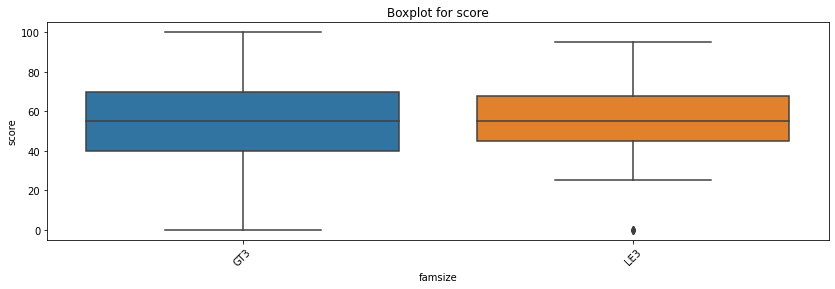

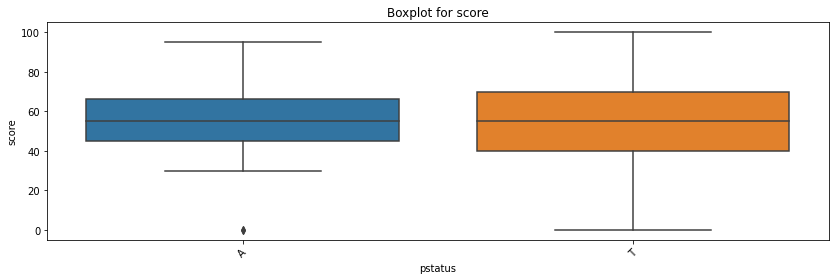

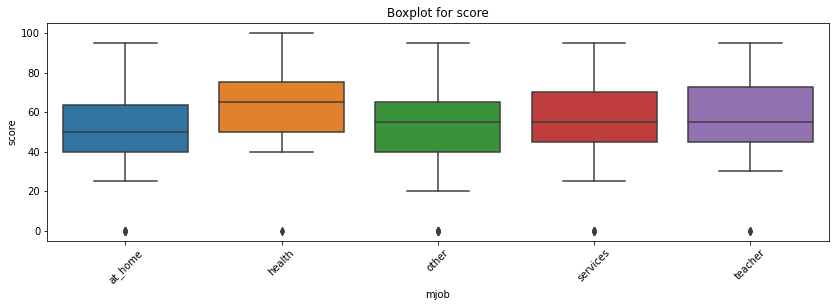

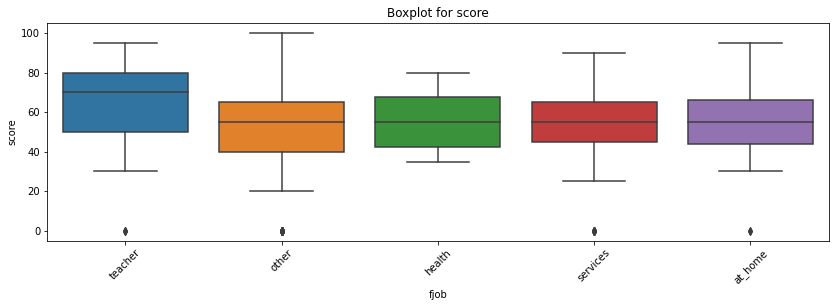

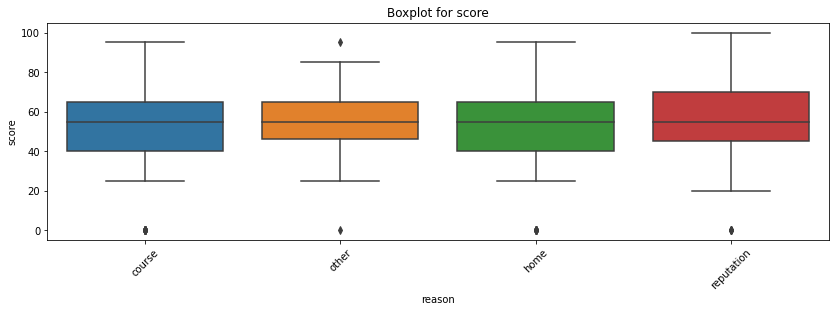

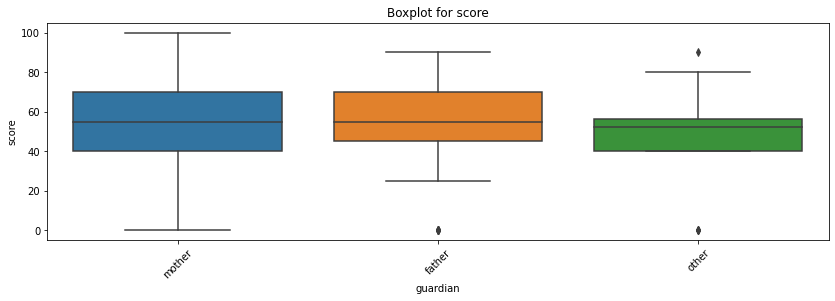

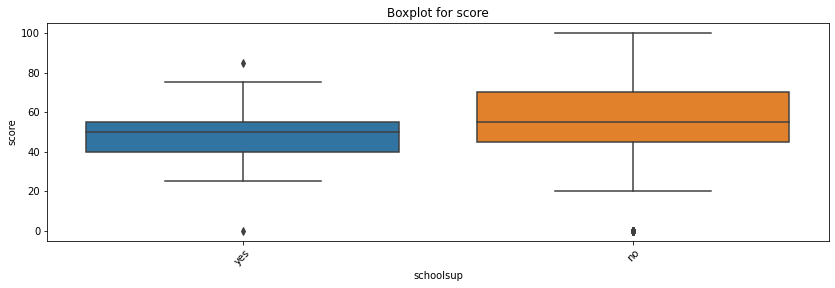

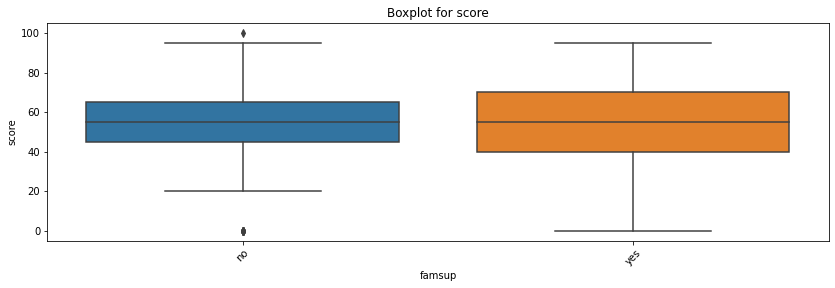

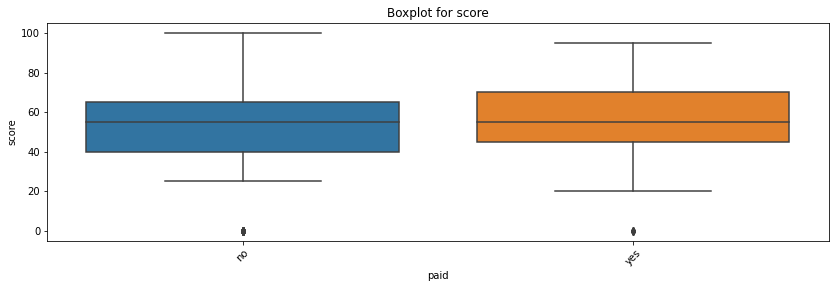

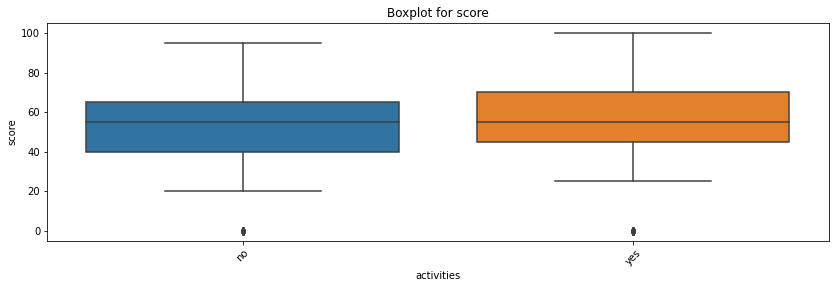

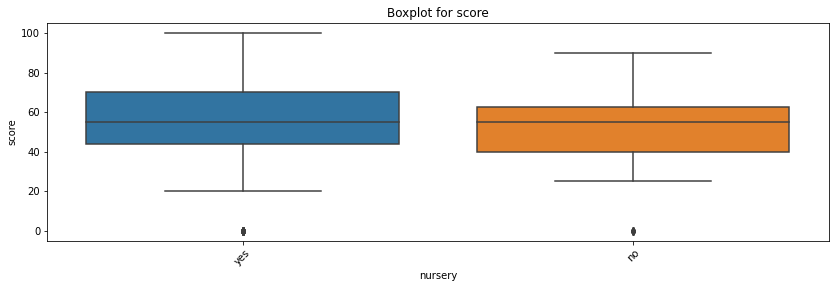

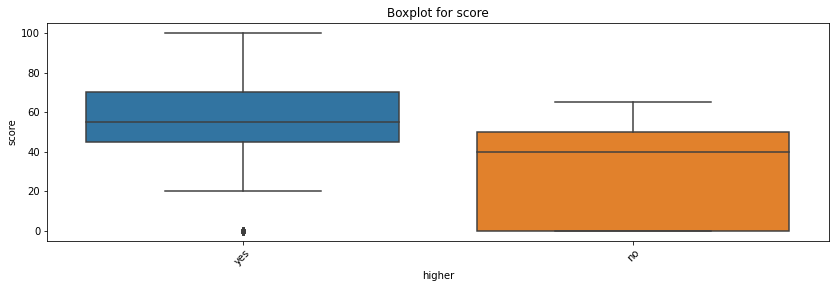

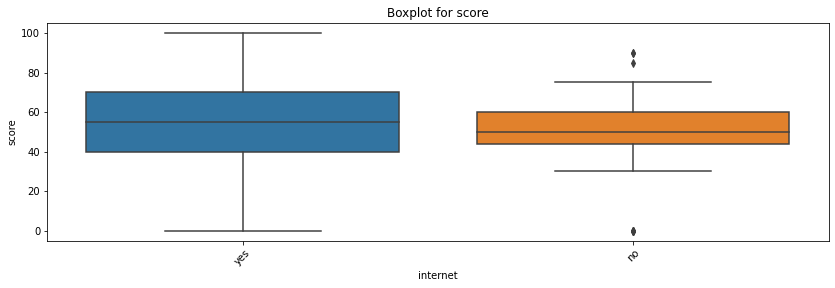

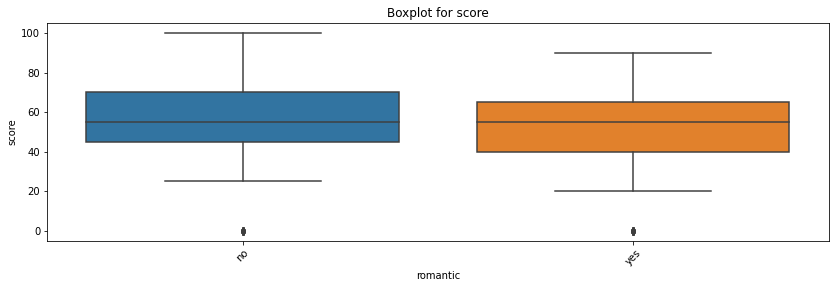

In [55]:
nominative_col = []

for column in stud_math.columns:
    if stud_math[column].dtype == 'O':
        nominative_col.append(column)

print(nominative_col)

for col in nominative_col:
    get_boxplot(stud_math, x=col, y='score')

По графикам можно сказать, что параметры school, sex, famsize, pstatus, famsup, paid, activities, nursery и romantic не оказывают достаточного влияния на успеваемость учеников.

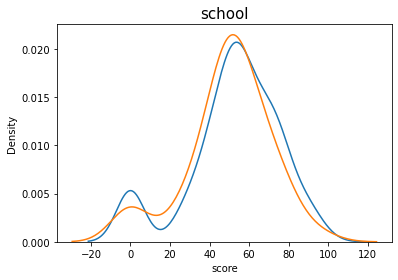

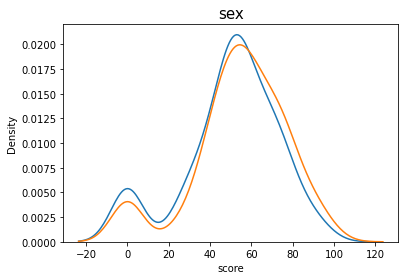

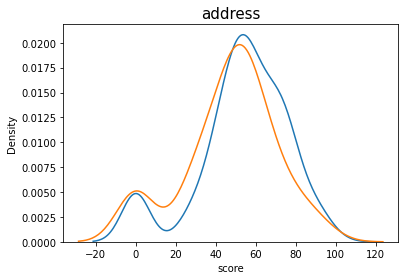

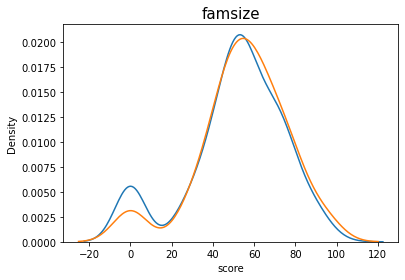

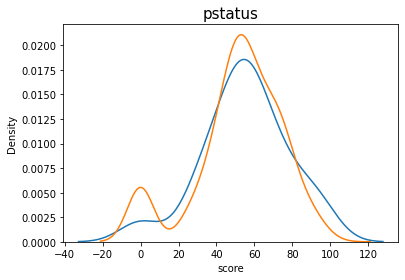

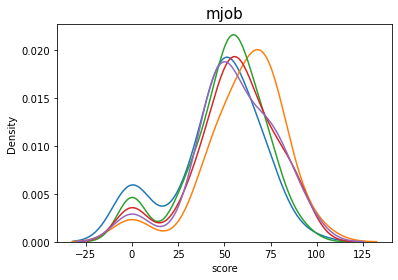

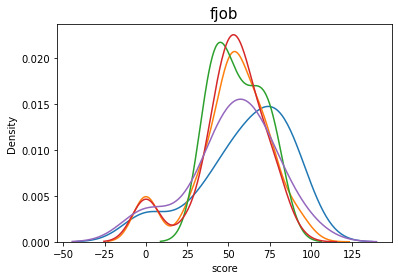

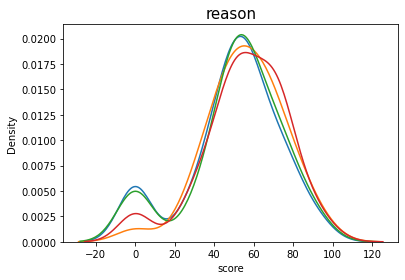

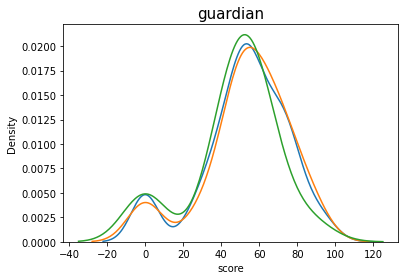

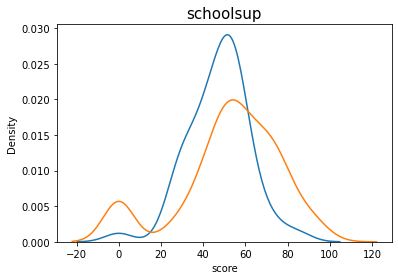

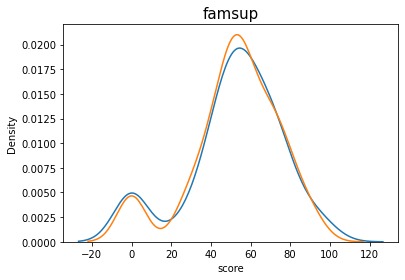

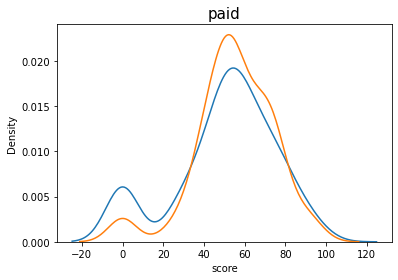

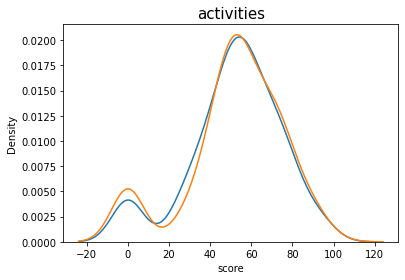

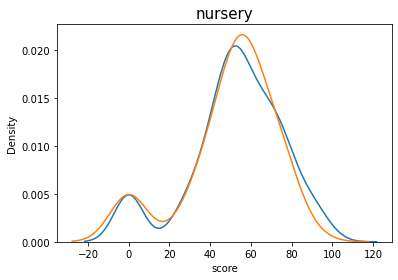

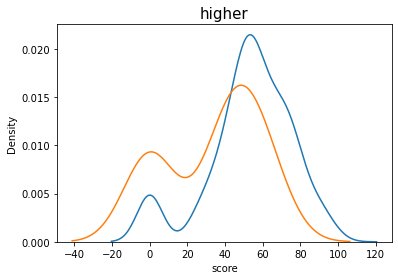

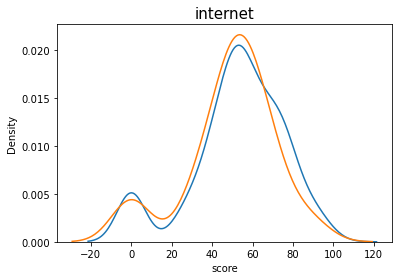

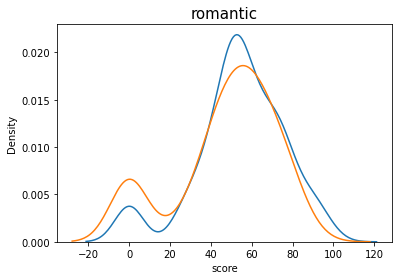

In [56]:
for i in ['school', 'sex', 'address', 'famsize', 'pstatus',
          'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
          'famsup', 'paid', 'activities', 'nursery', 'higher', 
          'internet', 'romantic']:
    get_kdeplot(i)

На параметр score оказывают влияние следующие категориальные параметры: 'sex', 'address', 'mjob', 'fjob', 'reason', 'paid', 'schoolsup' и 'higher'.

# ИТОГОВЫЙ ДАТАФРЕЙМ

In [57]:
stud_math_model = stud_math[['failures','sex', 'address', 'mjob', 'fjob',
                                       'reason', 'paid', 'schoolsup', 'higher']]

In [58]:
stud_math_model.head(10)

,failures,sex,address,mjob,fjob,reason,paid,schoolsup,higher
0,0.0,F,U,at_home,teacher,course,no,yes,yes
1,0.0,F,U,at_home,other,course,no,no,yes
2,3.0,F,U,at_home,other,other,no,yes,yes
3,0.0,F,U,health,other,home,yes,no,yes
4,0.0,F,U,other,other,home,yes,no,yes
5,0.0,M,U,services,other,reputation,yes,no,yes
6,0.0,M,U,other,other,home,no,no,yes
7,0.0,F,U,other,teacher,home,no,yes,yes
8,0.0,M,U,services,other,home,yes,no,yes
9,0.0,M,U,other,other,home,yes,no,yes


# ДОПОЛНИТЕЛЬНЫЙ ВАРИАНТ

Замена всех категориальные параметры на числовые, и их последующая группировка. За основу будет взят уже сделанный очищенный датасет. Из него будут выбраны параметры которые оказывающие даже небольшое влияние.

In [59]:
stud_math_v2 = stud_math

In [60]:
stud_math_v2['sex'] = stud_math_v2['sex'].map({'M':0,'F':1})
stud_math_v2['address'] = stud_math_v2['address'].map({'U':1,'R':0})
stud_math_v2['age'] = stud_math_v2['age'].map({15:4, 16:4, 17:3, 18:2, 19:1, 20:5, 21:0, 22:1})
stud_math_v2['medu'] = stud_math_v2['medu'].map({0:3, 1:0, 2:1, 3:0, 4:1})
stud_math_v2['fedu'] = stud_math_v2['fedu'].map({0:2, 1:0, 2:1, 3:0, 4:1})
stud_math_v2['mjob'] = stud_math_v2['mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':1})
stud_math_v2['fjob'] = stud_math_v2['fjob'].map({'at_home':0, 'health':0, 'other':0, 'services':0, 'teacher':1})
stud_math_v2['reason'] = stud_math_v2['reason'].map({'course':0, 'home':1, 'other':1, 'reputation':1})
stud_math_v2['guardian'] = stud_math_v2['guardian'].map({'mother':1, 'father':1, 'other':0})
stud_math_v2['traveltime'] = stud_math_v2['traveltime'].map({1:0, 2:1, 3:1, 4:1})
stud_math_v2['studytime'] = stud_math_v2['studytime'].map({1:0, 2:1, 3:2, 4:2})
stud_math_v2['failures'] = stud_math_v2['failures'].map({0:0, 1:1, 2:2, 3:2})
stud_math_v2['schoolsup'] = stud_math_v2['schoolsup'].map({'no':1, 'yes':0})
stud_math_v2['higher'] = stud_math_v2['higher'].map({'no':0, 'yes':1})
stud_math_v2['internet'] = stud_math_v2['internet'].map({'no':0, 'yes':1})
stud_math_v2['freetime'] = stud_math_v2['freetime'].map({1:0, 2:2, 3:0, 4:1, 5:1})
stud_math_v2['goout'] = stud_math_v2['goout'].map({1:1, 2:2, 3:1, 4:0, 5:0})
stud_math_v2['health'] = stud_math_v2['health'].map({1:2, 2:0, 3:0, 4:0, 5:1})

stud_math_v2['famsize'] = stud_math_v2['famsize'].map({'LE3':0, 'GT3':1})
stud_math_v2['pstatus'] = stud_math_v2['pstatus'].map({'A':0, 'T':1})
stud_math_v2['famsup'] = stud_math_v2['famsup'].map({'no':0, 'yes':1})
stud_math_v2['paid'] = stud_math_v2['paid'].map({'no':0, 'yes':1})
stud_math_v2['activities'] = stud_math_v2['activities'].map({'no':0, 'yes':1})
stud_math_v2['nursery'] = stud_math_v2['nursery'].map({'no':0, 'yes':1})
stud_math_v2['romantic'] = stud_math['romantic'].map({'no':0, 'yes':1})
 

,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
sex,1.000000,-0.036229,-0.003655,0.083793,-0.035993,-0.004127,-0.034355,-0.099837,-0.044147,0.052955,-0.084082,-0.030774,0.342680,-0.020738,-0.138271,0.171959,0.107785,-0.112306,-0.005070,0.142296,-0.065578,0.138798,-0.038514,-0.085964,0.055549,-0.001222,-0.028002,-0.098026
age,-0.036229,1.000000,0.183402,0.014160,-0.069927,0.111886,0.187659,0.151358,0.067376,-0.067551,0.382207,-0.105548,-0.048864,-0.193731,-0.212543,0.139605,0.040307,0.123155,0.073487,0.189691,0.037560,-0.143867,-0.028238,-0.034825,0.117449,0.091230,-0.117101,0.183158
address,-0.003655,0.183402,1.000000,-0.062692,-0.055373,0.138460,0.010541,0.177927,0.002232,0.020902,-0.045608,-0.210227,-0.040130,-0.100352,-0.031809,0.041945,0.058155,-0.050838,0.037285,0.058302,0.200115,-0.012644,-0.005662,0.017037,-0.075542,-0.020180,-0.034562,0.122058
famsize,0.083793,0.014160,-0.062692,1.000000,0.064290,0.038070,-0.006670,-0.048715,0.062371,-0.008368,-0.057375,-0.062946,0.095594,-0.008858,-0.030837,0.094415,0.081517,0.018433,-0.091145,0.022713,-0.002770,-0.005034,0.027362,-0.056643,0.048259,-0.034147,-0.074113,-0.063565
pstatus,-0.035993,-0.069927,-0.055373,0.064290,1.000000,0.017460,-0.098686,-0.044089,-0.079490,-0.018675,0.049635,0.083074,-0.001177,0.001710,0.035463,-0.008983,0.020295,0.088960,-0.070371,-0.030077,0.047818,-0.051152,0.013928,0.038132,0.020692,-0.036244,-0.095515,-0.039519
medu,-0.004127,0.111886,0.138460,0.038070,0.017460,1.000000,0.191718,0.130172,0.150250,-0.006350,0.077055,-0.026428,0.056780,-0.158925,0.017681,0.079347,0.127098,0.075854,0.147559,0.036493,0.127029,0.031082,-0.055285,0.051719,0.021298,-0.062750,-0.044250,0.147190
fedu,-0.034355,0.187659,0.010541,-0.006670,-0.098686,0.191718,1.000000,0.091856,0.223087,0.019923,0.074243,-0.016888,0.012684,-0.122482,0.041671,0.098241,0.025555,-0.009949,0.070056,0.087147,0.066208,-0.053967,-0.068994,0.083775,-0.034078,0.065145,0.000244,0.065256
mjob,-0.099837,0.151358,0.177927,-0.048715,-0.044089,0.130172,0.091856,1.000000,0.018660,0.163190,0.065872,-0.112512,-0.036634,-0.059822,0.058176,0.112307,0.078988,0.040304,0.091033,0.143878,0.189038,-0.009669,-0.019863,0.177846,-0.029949,0.009819,0.017432,0.153191
fjob,-0.044147,0.067376,0.002232,0.062371,-0.079490,0.150250,0.223087,0.018660,1.000000,-0.013805,0.077751,-0.003698,-0.029376,-0.067219,-0.065294,0.062367,-0.047306,-0.026141,0.043679,0.017915,-0.024727,0.039659,-0.075502,0.063184,-0.018042,-0.028471,-0.010620,0.093225
reason,0.052955,-0.067551,0.020902,-0.008368,-0.018675,-0.006350,0.019923,0.163190,-0.013805,1.000000,-0.119668,-0.014127,0.069107,-0.006273,0.001803,0.082746,0.121512,0.015428,0.054503,0.038629,0.062011,0.015036,-0.006153,-0.052752,0.036118,-0.026583,0.122994,0.082208


<AxesSubplot:>

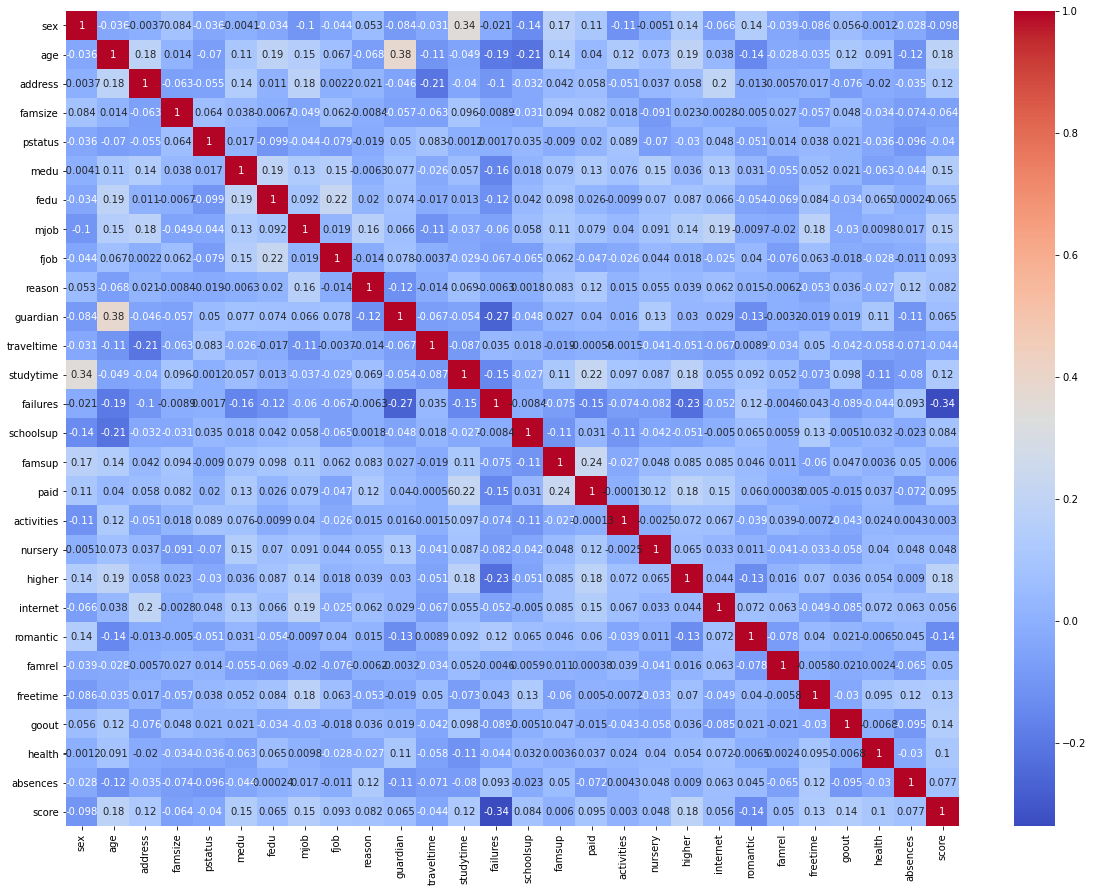

In [61]:
correlation = stud_math_v2.corr()
display(correlation)
plt.subplots(figsize=(20,15))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')